# Logistic regression
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category.

### Given below are the methods used replictate the working of Logistic Regression algorithm


## 1. Perceptron Trick
Logistic regression and the perceptron algorithm are very similar to each other. It’s common to think of logistic regression as a kind of perceptron algorithm on steroids, in that a logistic model can predict probabilities while a perceptron can only predict yes or no.

Transformation :

Ax + By + C = 0

Ax + By + C = 0 then query point is lie on line , if Ax + By + C > 0 then +ve and if Ax + By + C < 0 then -ve.

## 2. Sigmoid Function :
The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities. A certain sigmoid function is widely used in binary classification problems using logistic regression. It maps inputs from -infinity to infinity to be from 0 to 1, which intends to model the probability of binary events.

## 3. Gradient descent

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

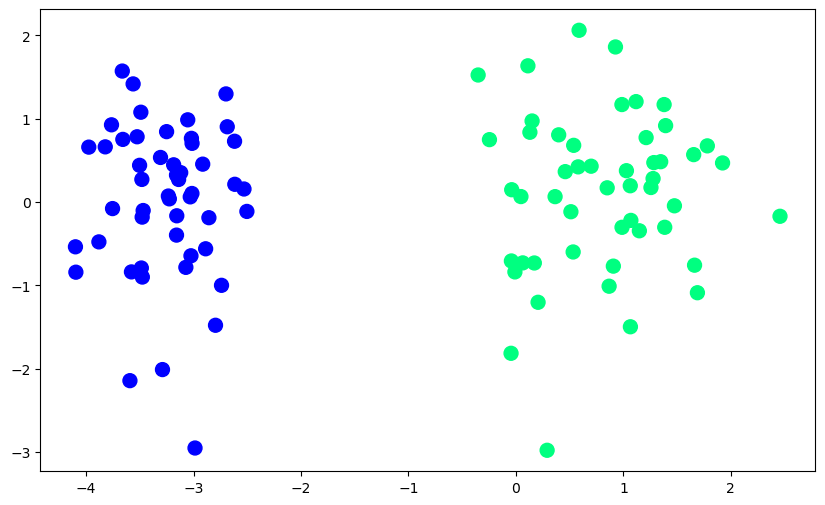

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Perceptron Trick

In [133]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [134]:
def step(z):
    return 1 if z>0 else 0

In [135]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[0.98628302 0.45500818]
1.3000000000000003


In [136]:
m = -(coef_[0]/coef_[1]) # m = A/B
b = -(intercept_/coef_[1]) # b = C/B

In [137]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

<IPython.core.display.Javascript object>


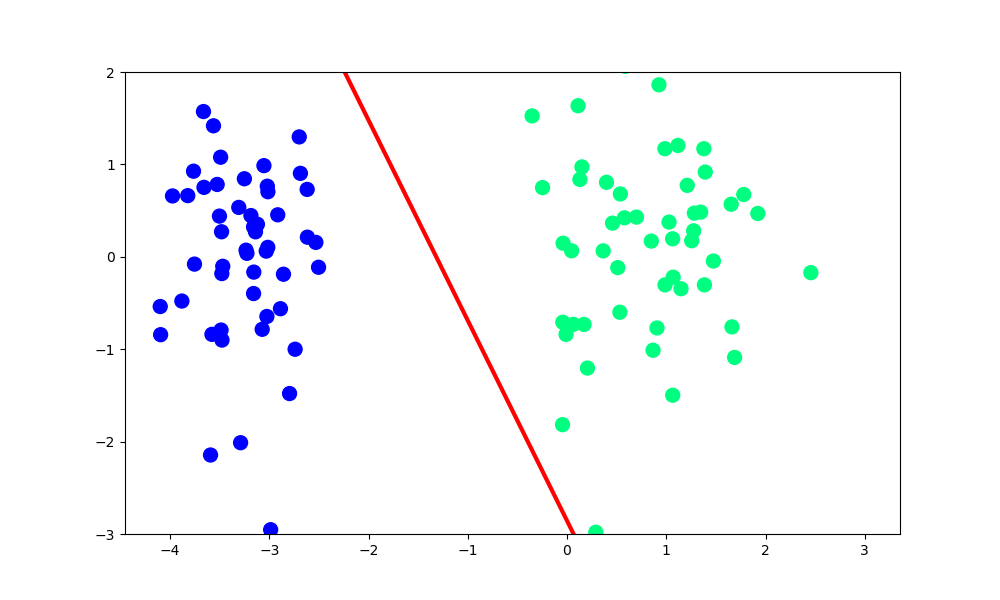

(-3.0, 2.0)

In [138]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [139]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [140]:
m,b = perceptron(X,y)

In [141]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


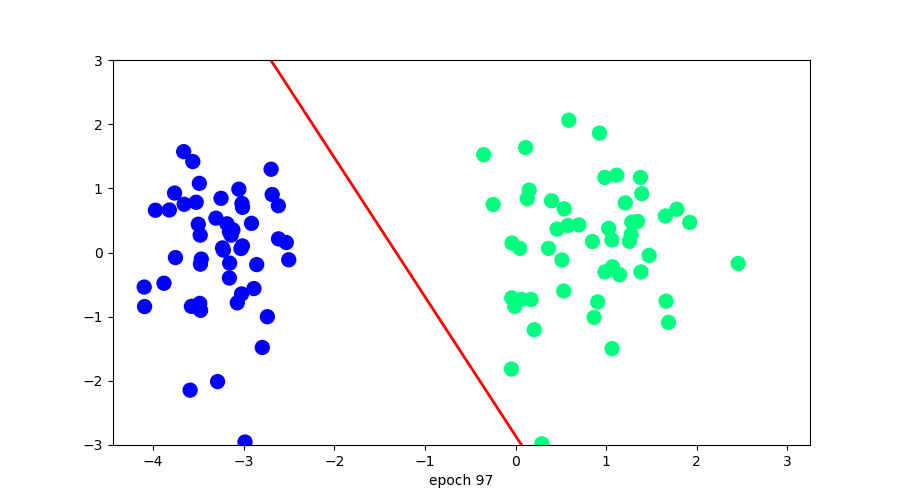

In [142]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [131]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [96]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [101]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input + b1

<IPython.core.display.Javascript object>


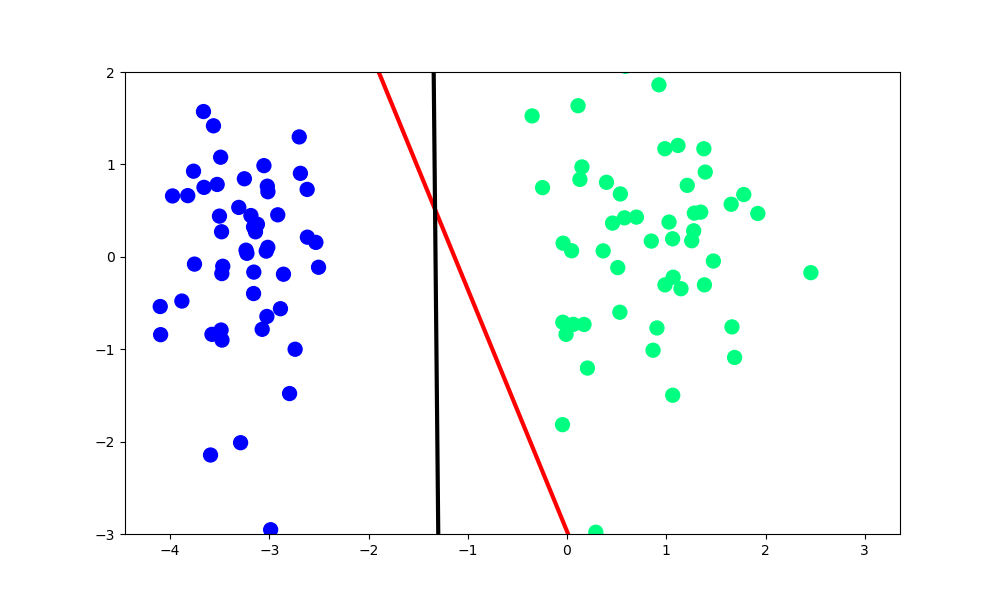

(-3.0, 2.0)

In [114]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#### The main issue with perceptron trick is that it stops the epochs right after the last misclassified point becomes correctly classified. This can lead to issues when trying to predict classification using new outside data. 

## Sigmoid Function

In [120]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [121]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [122]:
intercept_,coef_ = perceptron(X,y)
m2 = -(coef_[0]/coef_[1])
b2 = -(intercept_/coef_[1])

<IPython.core.display.Javascript object>


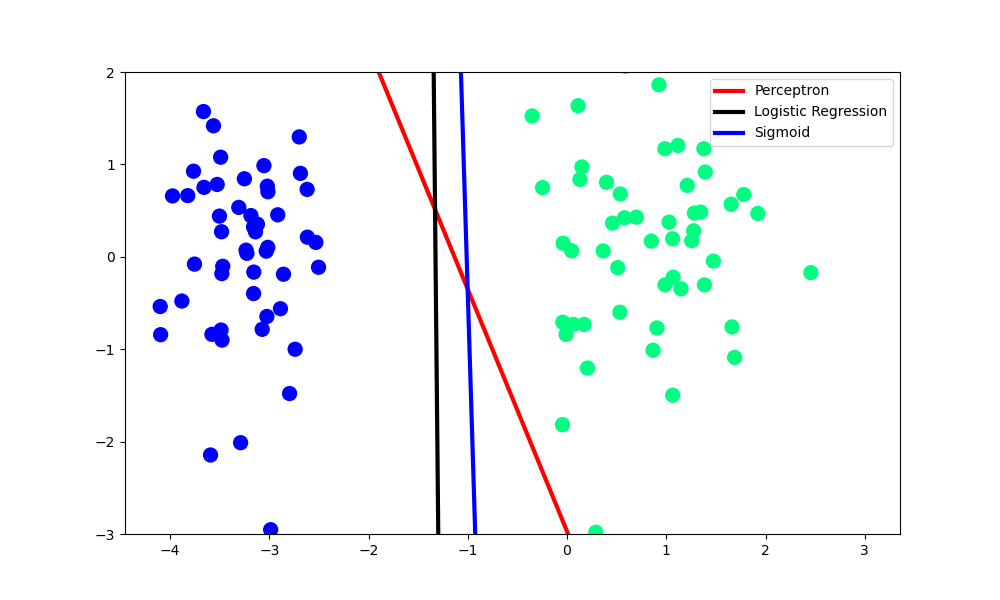

In [124]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input + b2

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='Perceptron')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='Logistic Regression')
plt.plot(x_input2,y_input2,color='blue',linewidth=3,label='Sigmoid')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()

#### The sigmoid function shows more accuracy when compared to the perceptron trick.

# Gradient Descent

In [125]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [126]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [127]:
coef_,intercept_ = gd(X,y)
m3 = -(coef_[0]/coef_[1])
b3 = -(intercept_/coef_[1])

x_input3 = np.linspace(-3,3,100)
y_input3 = m3*x_input3 + b3

<IPython.core.display.Javascript object>


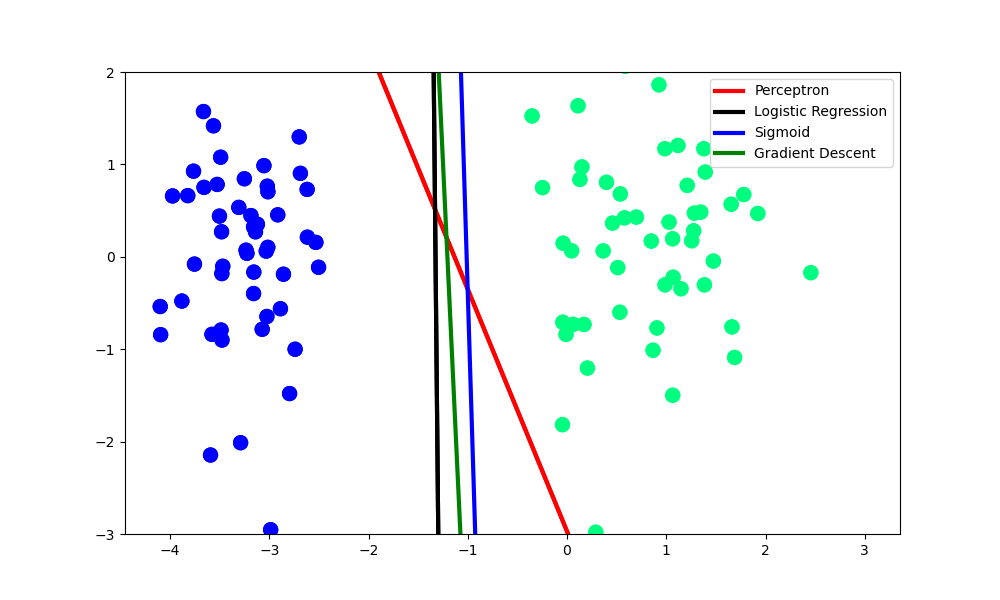

In [128]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

plt.plot(x_input,y_input,color='red',linewidth=3,label='Perceptron')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='Logistic Regression')
plt.plot(x_input2,y_input2,color='blue',linewidth=3,label='Sigmoid')
plt.plot(x_input3,y_input3,color='green',linewidth=3,label='Gradient Descent')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()